In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Функция чтения файла формата csv. Принимает имя файла и разделитель

In [2]:
def read_file(file_name, sep):
    return pd.read_csv(file_name, sep=sep)

In [3]:
df = read_file(r'C:\Users\HP\Notebooks\DataSets\titanic.csv', '\t')

Вывод содержимого файла(первых 5 строк)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Функция отрисовки столбчатого графика количества человек разного пола

In [268]:
def draw_gender(x1, x2, label1="", label2=""):
    fig, ax = plt.subplots()
    ax.bar(1, x1, color='blue', label=label1)
    ax.bar(2, x2, color = 'red', label=label2)
    ax.set_xticks([1,2])
    ax.set_xlabel('gender')
    ax.set_ylabel('count')
    ax.legend(loc = 'upper right')
    plt.show()

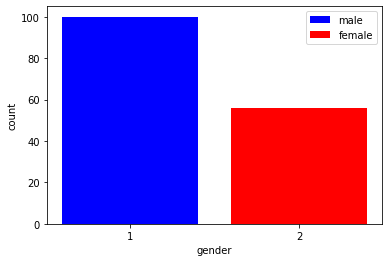

In [269]:
m = df.loc[df['Sex'] == 'male']['Sex'].size
f = df.loc[df['Sex'] == 'female']['Sex'].size
draw_gender(m, f, 'male', 'female')

Гистограмма по значению столбца

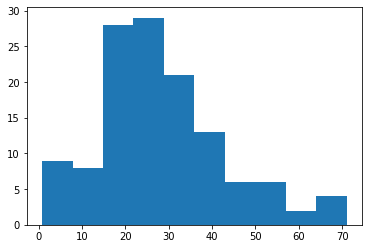

In [24]:
df["Age"].hist(grid=False)

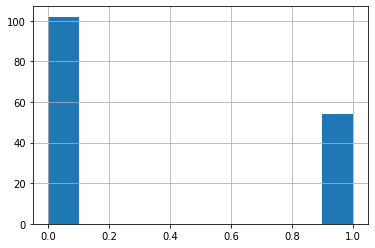

In [250]:
df['Survived'].hist()

Функция построения графика, отображающего количество пассажиров в зависимости от возраста и пола

In [299]:
def draw_2_columns_bar(data, color1='', color2='', 
                        label1='', label2='', x_label='', y_label=''):
    fig, ax = plt.subplots(figsize=(30,8))
    ind_width = 0.06
    alt = 0
    positions = []
    ages = data['Age'].unique()
    ages.sort()
    for i in ages:
        positions.append(alt + 0.03)
        t_df = df.loc[df['Age'] == i]
        f_c = len(t_df.loc[t_df['Sex'] == 'female'])
        m_c = len(t_df.loc[t_df['Sex'] == 'male'])
        if alt == 0:
            ax.bar(alt, f_c, color = color1, width = ind_width, label=label1)
            ax.bar(alt+0.06, m_c, color = color2, width = ind_width, label=label2)
        else:
            ax.bar(alt, f_c, color = color1, width = ind_width)
            ax.bar(alt+0.06, m_c, color = color2, width = ind_width)
        alt = alt + 0.3
    ax.set_xticks(positions)
    ax.set_xticklabels(ages)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.legend(loc = 'upper right')
    plt.show()

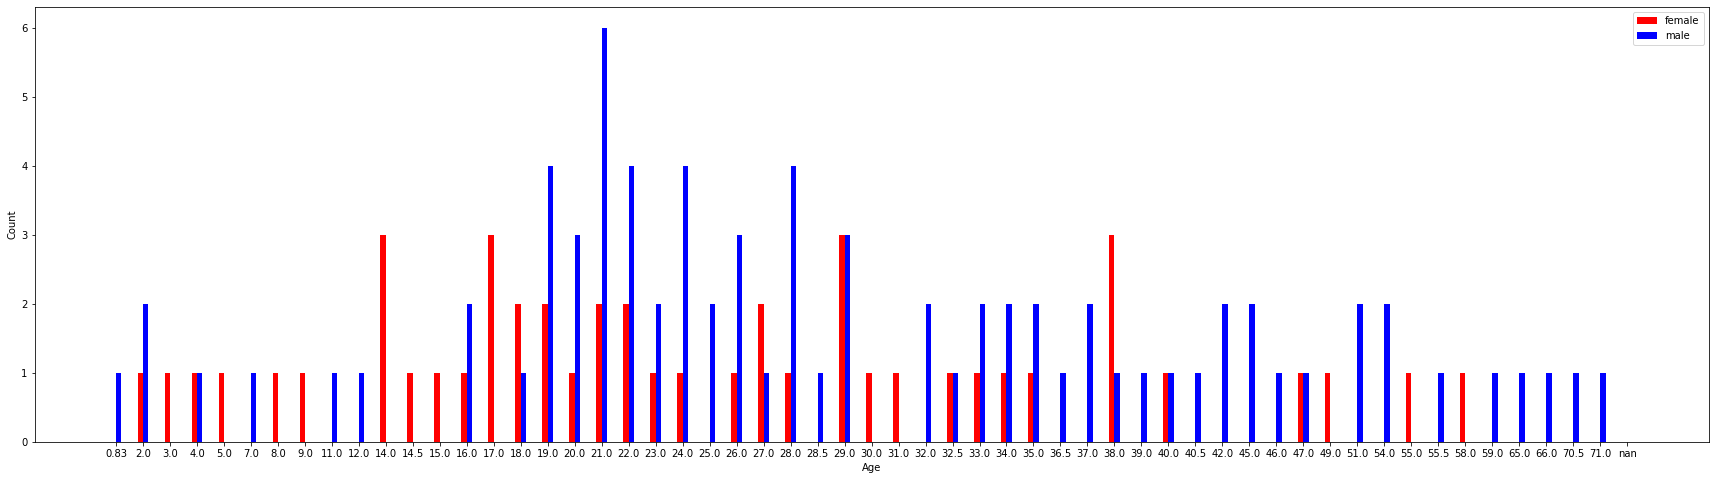

In [300]:
draw_2_columns_bar(df, color1='red', color2='blue', 
                        label1='female', label2='male', x_label='Age', y_label='Count')